In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_amz = pd.read_csv("/Users/laurasuemitsu/Desktop/DATA_FT_May_2025/Labs/Week 5/amz_uk_price_prediction_dataset.csv")

In [3]:
df_amz.shape

(2443651, 9)

In [4]:
df_amz.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
cat_freq_table = df_amz["category"].value_counts()

cat_freq_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [6]:

print("The 5 product categories most listed in the data set are:", cat_freq_table.nlargest(5), sep='\n')

The 5 product categories most listed in the data set are:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


In [7]:
top_5_cat = cat_freq_table.nlargest(5)

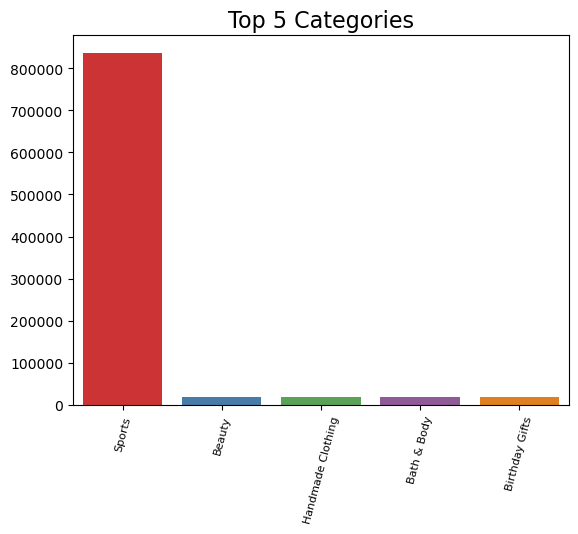

In [8]:
sns.barplot(x = top_5_cat.index, y = top_5_cat.values, hue = top_5_cat.index, palette = "Set1", legend = False)
plt.xlabel(None)
plt.xticks([0, 1, 2, 3, 4], ['Sports', 'Beauty', 'Handmade Clothing', 'Bath & Body', 'Birthday Gifts'], rotation=75, fontsize=8)
plt.title('Top 5 Categories', fontsize = 16)
plt.show()

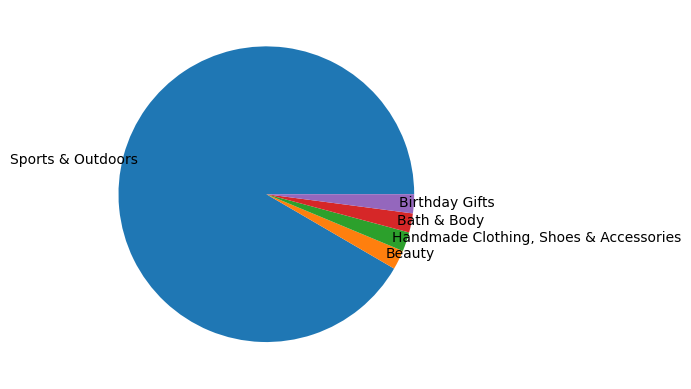

In [9]:
plt.pie(x = top_5_cat, labels = top_5_cat.index, labeldistance= 0.9)
plt.show()


- The category that dominates the list is Sports & Outdoors.

In [10]:
mean_price = round(df_amz["price"].mean(), 2)
median_price = round(df_amz["price"].median(), 2)
mode_price = df_amz["price"].mode()[0]

mean_price, median_price, mode_price

(89.24, 19.09, 9.99)

The average price point of products listed is the mean_price - 89.24.

There's a considerate difference between this value and the mode of the prices, which is almost 10 times smaller (9.99) than the mean price.

In [11]:
var_price = round(df_amz["price"].var(), 3)
std_price = round(df_amz["price"].std(), 3)

max_price = round(df_amz["price"].max())
min_price = round(df_amz["price"].min())
range_price = max_price - min_price

q1 = np.percentile(df_amz["price"], 25)
q3 = np.percentile(df_amz["price"], 75)
iqr_price = q3 - q1

var_price, std_price, range_price, iqr_price


(119445.485, 345.609, 100000, 36.0)

The prices listed are considerably variable among themselves, since the range between the maximum price and the minimum price equals to 100000.

The value of the standard deviation, quite high, also gives us an indication that the prices are indeed spreaded along their distribution.

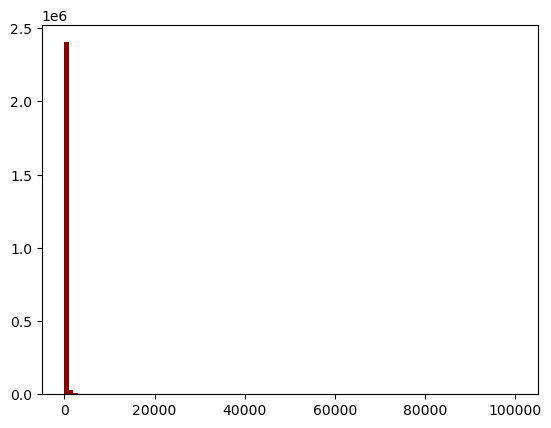

In [12]:
plt.hist(df_amz["price"], bins = 100, color="darkred")
plt.show()

### Since we have some considerable outliers, to better visualize data, we can zoom in the zone with most values observations:

In [13]:
# Determining the price of 90% of the products in the dataset:
quant_price = np.percentile(df_amz["price"], 90)
quant_price

149.99

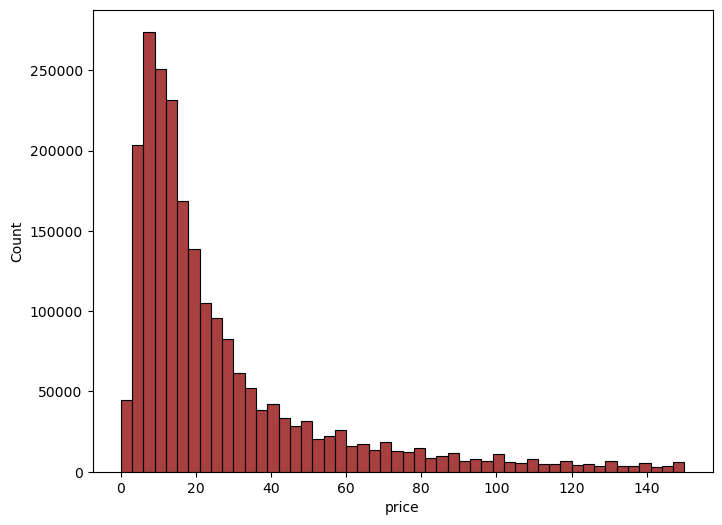

In [14]:
filterprice_df_amz = df_amz[df_amz["price"].between(0,150)]["price"]
plt.figure(figsize=(8,6))
sns.histplot(filterprice_df_amz, bins = 50, color="darkred")
plt.show()

<Figure size 2500x1000 with 0 Axes>

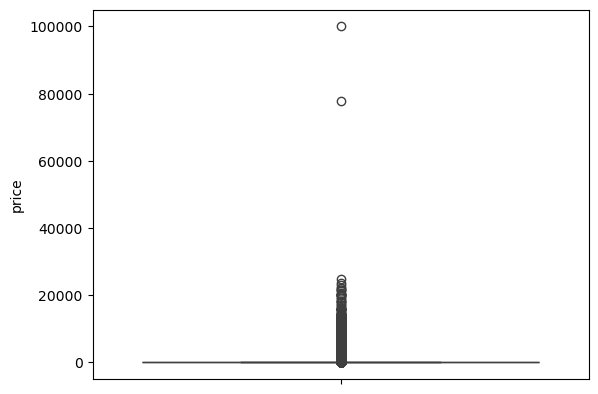

<Figure size 2500x1000 with 0 Axes>

In [15]:
sns.boxplot(df_amz["price"])
plt.figure(figsize=(25,10))

<Figure size 1000x700 with 0 Axes>

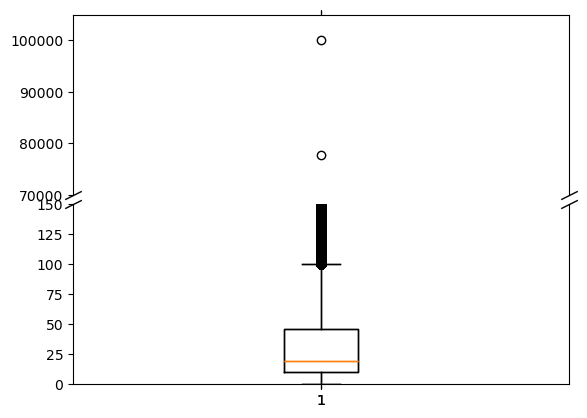

In [16]:
fig = plt.figure(figsize =(10, 7))

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05) 
 
plt.boxplot(df_amz["price"])

ax1.boxplot(df_amz["price"])
ax2.boxplot(df_amz["price"])

ax1.set_ylim(70000, 105000)  # outliers only
ax2.set_ylim(0, 150)  # most of the data


ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False) 
ax2.xaxis.tick_bottom()

d = .5 
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.show()


This improved boxplot gives us more information than the previous one and still shows us the aproximate values for the outliers: almost 80k and almost 100k.

In [17]:
df_amz["stars"].value_counts()

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

In [18]:
mean_rating = round(df_amz["stars"].mean(), 2)
median_rating = df_amz["stars"].median()
mode_rating = df_amz["stars"].mode()[0]

mean_rating, median_rating, mode_rating

(2.15, 0.0, 0.0)

According to the values of median and mode, we see that the most frequent rate for products given by clients is 0.0.

In [19]:
var_rating = round(df_amz["stars"].var(), 3)
std_rating = round(df_amz["stars"].std(), 3)
q1 = np.percentile(df_amz["stars"], 25)
q3 = np.percentile(df_amz["stars"], 75)
iqr_rating = q3 - q1

var_rating, std_rating, iqr_rating


(4.817, 2.195, 4.4)

The ratings vary quite considerably, since the maximum value is 5.0 and the iqr rating is equal to 4.4.

The variance and the standard variation are also quite high for the magnitude of the dimension being evaluated.

In [45]:
skew_rating = round(df_amz["stars"].skew(), 5)
kurtosis_rating = round(df_amz["stars"].kurtosis(), 5)

skew_rating, kurtosis_rating

(0.08121, -1.92601)

The positive skew tells us that the rating distribution has a tail in the positive direction.

The negative kurtosis indicates that the shape of the curve is more flatted, with few outliers.

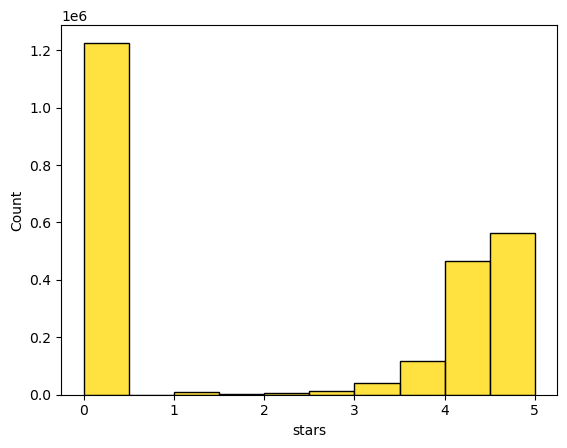

In [28]:
sns.histplot(df_amz["stars"], bins = 10, color="gold")
plt.show()

<Axes: xlabel='stars', ylabel='Count'>

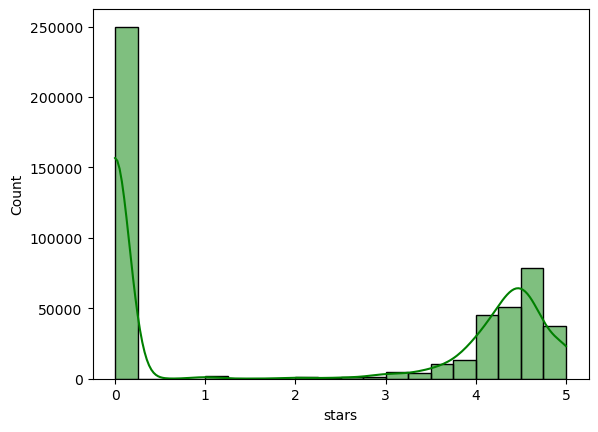

In [41]:
sns.histplot(df_amz.sample(500000)["stars"], bins=20, kde=True, color="green")

The more common rating for the UK Amazon products is 0.